In [1]:
import rasterio as rio
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
import numpy as np
import numpy.matlib
from scipy import interpolate
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import scipy
import os, sys, pickle, gzip
import datetime
import geopy.distance
import xarray as xr
import pandas as pd
import rasterio
import geopandas as gpd
import shapely.geometry
import shapely.ops
import xesmf as xe
import cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import itertools
import random
import metpy
from metpy.plots import USCOUNTIES

import warnings
warnings.filterwarnings('ignore')

In [2]:
dirEra5 = '/home/edcoffel/drive/MAX-Filer/Research/Climate-02/Data-02-edcoffel-F20/ERA5'

In [3]:
# This is code to set some plotting settings (like font size / family) and define the MidpointNormalize class for plotting colorbars

import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import warnings
from IPython import get_ipython
ipython = get_ipython()

ipython.magic('load_ext autoreload')
ipython.magic('autoreload 2')
ipython.magic('matplotlib inline')

warnings.filterwarnings('ignore')

font_dirs = ['/home/edcoffel/drive/MAX-Filer/Research/Climate-01/Personal-F20/edcoffel-F20/fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

plt.rcParams["font.family"] = "Helvetica"
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('axes', labelsize=16)    # fontsize of the tick labels


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [5]:
ds_txx = xr.open_mfdataset('%s/era5_txx.nc'%dirEra5)
ds_txx.load()
ds_txx['txx'] -= 273.15

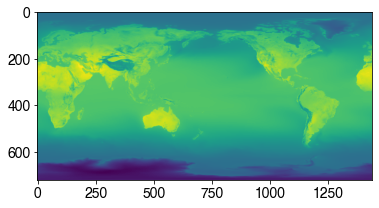

In [7]:
plt.imshow(np.nanmean(ds_txx.txx.values, axis=0))

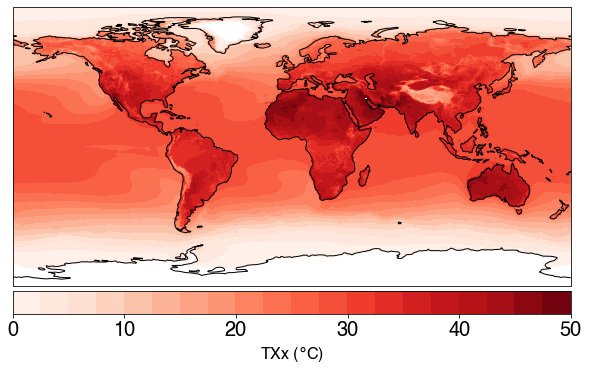

In [29]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([-128, -67, 23, 46])

v1 = 0
v2 = 50.1
vstep = 2.5
vlabelstep = 10

midnorm = MidpointNormalize(vmin=v1, vcenter=(v1+v2)/2, vmax=v2)
cmap = plt.cm.get_cmap('Reds')
c = plt.contourf(ds_txx.longitude, ds_txx.latitude, ds_txx.txx.mean(dim='time'), cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep))
# plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
# ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
ax.coastlines()
scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
scmap.set_array([])
cb = plt.colorbar(scmap, ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal',
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('TXx ($\degree$C)')